In [1]:
import numpy as np
import matplotlib.pyplot as plt

from antenna_utils import *
from data_utils import *
from plot_utils import *

# plt.rcParams['image.cmap'] = 'cubehelix'
plt.rcParams['image.cmap'] = 'afmhot'

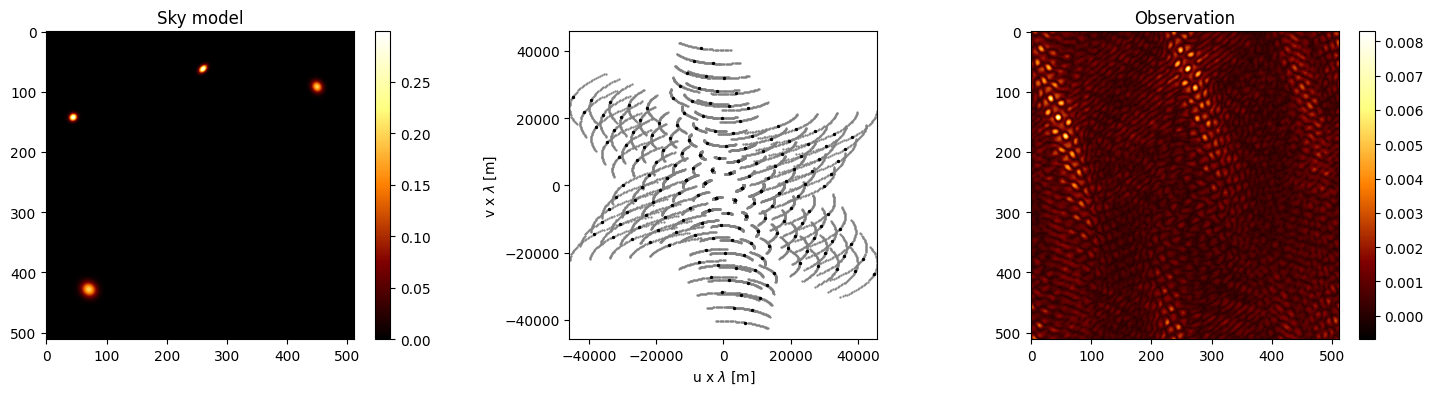

In [2]:
# Antenna parameters
x_lim = 30000
y_lim = 30000
n_antenna = 3*5
n_baselines = n_antenna*(n_antenna-1)
radius = 30000
alpha = 120

# Source tracking parameters
source_decl = -20/180*np.pi
array_lat = 19.1/180*np.pi
track_time = 4
delta_t = 5/60 # 300 segs
t_0 = -0.5

# Sky model
nx = 512
ny = 512
pix_sizes = [20, 10, 10, 15]
amplitudes = [0.2, 0.3, 0.3, 0.2]
sky = n_source_sky((nx,ny), pix_sizes, amplitudes)

# UV parameters
uv_dim = sky.shape[0]

# Array
# arr = random_antenna_arr(n_antenna, x_lim, y_lim)
# arr = radial_antenna_arr(n_antenna, x_lim, y_lim,radius)
arr = y_antenna_arr(int(n_antenna/3), radius, alpha)
# arr_center = random_antenna_arr(int(n_antenna/3), int(x_lim/5), int(y_lim/5))
# arr = np.concatenate((arr,arr_center), axis=0)
# Get baselines
base_arr = get_baselines(arr)
# Get time integrated uv samples
track = uv_time_int(base_arr, array_lat, source_decl, track_time, delta_t, t_0)
# Get uv mask
uv_plane = get_uv_plane(track,uv_dim)
uv_plane_mask = get_uv_mask(uv_plane)
# Get the dirty beam
beam = get_beam(uv_plane_mask)
# Get the sky model FT
sky_uv = get_sky_uv(sky)
# Sample Fourier space
obs_uv = get_obs_uv(sky_uv,uv_plane_mask)
# Get observed sky
obs_sky = get_obs_sky(obs_uv, abs=True)
# Add noise
sigma = 0.1/512
obs_sky += np.random.randn(obs_sky.shape[0],obs_sky.shape[1])*sigma

fig, ax = plt.subplots(1,3, figsize=(18,4))

im = ax[0].imshow(sky)
plt.colorbar(im, ax=ax[0])
ax[0].set_title("Sky model")

plot_baselines(track, n_baselines ,ax[1], fig)

im = ax[2].imshow(obs_sky)
plt.colorbar(im, ax=ax[2])
ax[2].set_title("Observation")

plt.show()

